# KNN (K-nearest neighbors algorithm)

we're going to use the kNN classifier for the task of breast cancer detection. The dataset is available through sklearn. Let's load it.

In [56]:
# plt to plot figures
import matplotlib.pyplot as plt
# numpy for array/matrix operations
import numpy as np
# loading the dataset loader function from sklearn
from sklearn.datasets import load_breast_cancer

# we set a seed variable for functions that use randomization (e.g. when shuffling data samples)
# this way, we can have reproducible results even with randomization
RANDOM_STATE = 2

In [57]:
# loading the sklearn data object (python dictionary-style object)
data = load_breast_cancer()

In [58]:
data.keys()  # explore the dataset

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

### 1) Getting to know the dataset

Let's have a quick first look at how the dataset is structured, how many classes we have and the types of features that are provided. 

For more information on the sklearn (scikit-learn) library, see e.g. tutorials on:
https://scikit-learn.org/stable/tutorial/basic/tutorial.html

In [59]:
# Unrelated but maybe helpful: show class type of data (might clarify how to work with it)
print("Type of data: ", type(data))

# Check number and name of classes
print("Number of classes: ", len(np.unique(data['target'])))
print("Class names: ", data.target_names)

# features, target = data.data, data.target
X_all, y_all = data.data, data.target
# or with: features, target = load_breast_cancer(return_X_y=True)

print("Number of samples: ", X_all.shape[0])
print("Number of features: ", X_all.shape[1])
print("X_all shape =", X_all.shape)
print("X_all first 2 samples, \n", X_all[0:2])
print("y_all shape =", y_all.shape)  # a vector
print("y_all first 30 samples, \n", y_all[0:30])

Type of data:  <class 'sklearn.utils._bunch.Bunch'>
Number of classes:  2
Class names:  ['malignant' 'benign']
Number of samples:  569
Number of features:  30
X_all shape = (569, 30)
X_all first 2 samples, 
 [[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]]
y_all shape = (569,)
y_all first 30 samples, 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0]


In [60]:
# What kind of features?
print("Feature names:\n")
for idx, feature_name in enumerate(data.feature_names):
    print(idx, feature_name)

Feature names:

0 mean radius
1 mean texture
2 mean perimeter
3 mean area
4 mean smoothness
5 mean compactness
6 mean concavity
7 mean concave points
8 mean symmetry
9 mean fractal dimension
10 radius error
11 texture error
12 perimeter error
13 area error
14 smoothness error
15 compactness error
16 concavity error
17 concave points error
18 symmetry error
19 fractal dimension error
20 worst radius
21 worst texture
22 worst perimeter
23 worst area
24 worst smoothness
25 worst compactness
26 worst concavity
27 worst concave points
28 worst symmetry
29 worst fractal dimension


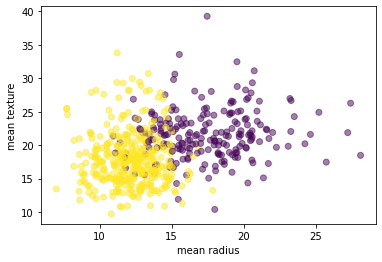

In [61]:
# example plot of two features (2D), mean texture and mean radius (features 0 and 1)
plt.scatter(data.data[:,0], data.data[:,1], c=data.target, alpha=0.5, cmap='viridis')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.show()

### 2) Defining a train and test set

Before we can start training and evaluating a machine learning model, we need to split our data samples into a train and test set. A common split percentage is selecting samples at random and assigning 80% train and 20% test, so let's do that here.

#### Create a 80/20 train/test split and report the number of samples in each subset (train/test).

In [62]:
# sklearn contains a function that can shuffle and split the data into test and train sets
from sklearn.model_selection import train_test_split

# Make a train/test split using 20% test size; shuffle the data before sampling
# don't forget to set the random seed in the function

### YOUR CODE HERE START
# X_all -> features , y_all -> targets
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=RANDOM_STATE)

# print the number of train and test samples
print("Number of train samples: \n", X_train.shape[0])
print("Number of test samples: \n", X_test.shape[0])

print("shape of train samples set: \n", X_train.shape)
print("shape of test samples set: \n", X_test.shape)

### YOUR CODE HERE END

Number of train samples: 
 455
Number of test samples: 
 114
shape of train samples set: 
 (455, 30)
shape of test samples set: 
 (114, 30)


### 3) Training and evaluating a first model

Tackling a Machine Learning task is an iterative process. For most Machine Learning problems that you're going to working on, it will usually be helpful to get a first model up and running as soon as possible - and then iterate from there. This helps in getting to know the task and can give you useful and important insights early on. 

Building a (simple) model early in development is a great for getting a feel for your Machine Learning problem, so let's do that here with a kNN model.

#### Build a first kNN model with your dataset split from above. Use default parameters for the kNN. Report accuracy. 

In [63]:
# import KNN model class
from sklearn.neighbors import KNeighborsClassifier
# import function to calculate accuracy 
from sklearn.metrics import accuracy_score

In [64]:
### YOUR CODE HERE START
# instantiate knn model with k=5 (=default)
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='euclidean')
# run fit method with the training data to "train" the KNN model
knn.fit(X_train, y_train)
...
# run predict method to classify samples in the test set
output = knn.predict(X_test)
# calculate accuracy on the predicted samples in the test set
def accuracy(prediction, reference):
    correct = np.sum(prediction==reference)
    return float(correct)/len(reference)

acc = accuracy(output, y_test)*100   # as a percentage
# acc = knn.score(X_test, y_test)  # gives same results

# print the accuracy as percentage of correctly classified samples in the test set (i.e. between 0%-100%)
print("Accuracy:", acc, "%")

### YOUR CODE HERE END

Accuracy: 91.22807017543859 %


#### 3.1) Note on evaluation metrics

For greatly imbalanced datasets the accuracy metric can be misleading. In such a case, other metrics, e.g. the "F1-score", might give us better insights into our model's performance. 

The Breast Cancer dataset is somewhat imbalanced: there are more "Benign" than "Malignant" samples, as we can see from the chance level accuracy.

#### Calculate and report "chance" level on your current dataset split. 

In [65]:
print("\nNumber of samples per class")

### YOUR CODE HERE START
# print number of samples per class in the entire dataset
classes,occs = np.unique(y_all, return_counts=True)
# print("Classes", classes)
# print("Number of samples for class0 =", occs[0])
# print("Number of samples for class1 =", occs[1])
print("Malignant (cancer) class total: ", occs[0])
print("Benign (non-cancer) class total: ", occs[1])


# print number of samples per class in the test set
classes,occs = np.unique(y_test, return_counts=True)
print("Malignant (cancer) class test: ", occs[0])
print("Benign (non-cancer) class test: ", occs[1])

# "chance" is defined as the share of the largest class of your data-(sub)set  
# (=accuracy, if we always output the largest class as our prediction)
# calculate chance on your test set
def chance_cal(reference):
    classes,occs = np.unique(reference, return_counts=True)
    return float(np.max(occs))/len(reference)
chance_level = chance_cal(y_test)

# print "chance" on the percentage scale (i.e. between 0%-100%)
print("Chance level: ", chance_level*100, "%")
### YOUR CODE HERE END



Number of samples per class
Malignant (cancer) class total:  212
Benign (non-cancer) class total:  357
Malignant (cancer) class test:  45
Benign (non-cancer) class test:  69
Chance level:  60.526315789473685 %



We can get the F1-score per class with a function in sklearn.

#### Calculate and report Precision, Recall and F1-scores on your current dataset split. 

In [66]:
# import function for calculation of precision, recall, f1
from sklearn.metrics import classification_report
# get and print all results on your test set using classification_report

### YOUR CODE HERE START
result = classification_report(y_test, output)
print(result)
### YOUR CODE HERE END

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        45
           1       0.93      0.93      0.93        69

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



[[40  5]
 [ 5 64]]


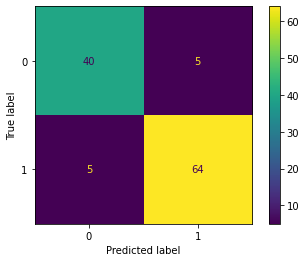

In [79]:
# visualization of the  confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test, output, labels=knn.classes_)
print(conf_matrix)
fig = ConfusionMatrixDisplay(conf_matrix, display_labels=knn.classes_)
fig.plot()
plt.show()

### 4) Data normalization

Training a model with features that came from various sources or are represented on different scales can cause issues for your learning algorithm. A common way to alleviate this issue is to standardize your data to have zero mean and unit standard deviation (std=1). This is done for each feature (=dimension) of your dataset. Mean and std of each feature are determined on the train set and then used to standardize both train and test samples using e.g. Z-normalization. 

Let's first take a look at our data and check if there is potentially a problem with different scales for different features: 

####  Create and then manually compare histograms for features "mean radius", "mean texture" and "mean compactness".

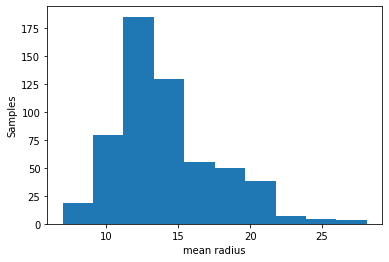

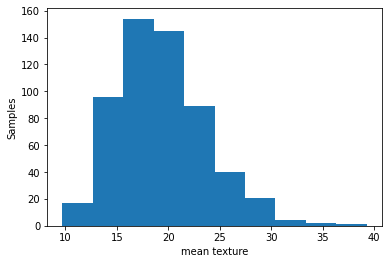

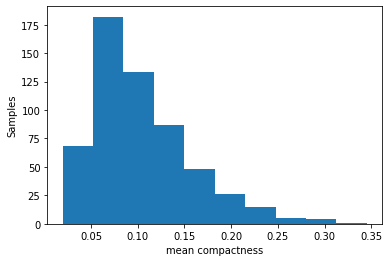

In [ ]:
### YOUR CODE HERE START
# mean radius
plt.hist(x=X_all[:,0])
plt.xlabel("mean radius")
plt.ylabel("Samples")
plt.show()

# mean texture
plt.hist(x=X_all[:,1])
plt.xlabel("mean texture")
plt.ylabel("Samples")
plt.show()

# mean compactness
plt.hist(x=X_all[:,5])
plt.xlabel("mean compactness")
plt.ylabel("Samples")
plt.show()
### YOUR CODE HERE END

While features "mean radius" and "mean texture" are on similar scales, mean compactness is not. There might be potential when standardizing the dataset.

We don't have to re-implement the scaling function, as it is already available in sklearn.

####  Apply z-normalization on the dataset split and evaluate. Report accuracy when using k={1,5,15} in your kNN classifier.

In [ ]:
# import class used to apply z-normalization on your dataset
from sklearn.preprocessing import StandardScaler

### YOUR CODE HERE START
# instantiate the scaler
scaler = StandardScaler()
# use the scaler's fit method to calculate mean and standard deviation of your train(!) set
scaler.fit(X_train)
# print("mean", scaler.mean_, "variance", scaler.var_)
...
# apply transform method to standardize your data subsets
X_train_standardized = scaler.transform(X_train)
X_test_standardized = scaler.transform(X_test)

# re-run KNN training and classification and evaluation
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='euclidean')
knn.fit(X_train_standardized, y_train)
...
output = knn.predict(X_test_standardized)
acc = knn.score(X_test_standardized, y_test)*100   # as a percentage

# get chance level of test set
chance_level = chance_cal(y_test)*100   # as a percnetage
### YOUR CODE HERE END

# print accuracy and chance level of your newly produced test results
print("Accuracy (Chance): {:.2f} ({:.2f})".format(acc, chance_level))
print("Accuracy: {} and Chance:{} ".format(acc, chance_level))

Accuracy (Chance): 97.37 (60.53)
Accuracy: 97.36842105263158 and Chance:60.526315789473685 


### 5) Training and evaluating with small datasets

When there is only a limited amount of data available for our task, we might face the dilemma of whether to prioritize training or testing (by creating a larger or smaller test set). Additionally, a randomly selected train/test split of our data might be suboptimal and inaccurately reflect the task's given data distribution. In such a case, a technique called k-fold cross-validation can benefit your development.

####  Run k-fold cross validation on your dataset and report mean/std accuracy over 10 splits.

In [ ]:
# import k-fold cross validation class to automatically create randomized splits of the dataset
from sklearn.model_selection import KFold

### YOUR CODE HERE START
# define parameters for k-fold cross validation: 10 splits with shuffling;
# also set random seed ("random_state") to our global RANDOM_STATE variable for reproducible/comparable results
kf = KFold(n_splits=10, shuffle=True, random_state=RANDOM_STATE)
# create the splits with KFold's get_n_splits method
kf.get_n_splits()
...
# we initialize an empty list to store accuracy numbers for each split
acc_list = []
# run KNN training, testing and accuracy evaluation for each split 
for split_n, (train_index, test_index) in enumerate(kf.split(X_all), 1):
    X_train_split, X_test_split = X_all[train_index], X_all[test_index]
    y_train_split, y_test_split = y_all[train_index], y_all[test_index]

    knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='euclidean')
    knn.fit(X_train_split, y_train_split)
    ...
    output = knn.predict(X_test_split)
    acc = knn.score(X_test_split, y_test_split)*100   # as a percentage
    acc_list.append(acc)

    # chance level of the current test set
    chance_level = chance_cal(y_test_split)*100   # as a percentage

    # print acc and chance level for each split
    print("Split-Nr {:02}\tAcc (Chance): {:.2f}% ({:.2f}%)".format(split_n, acc, chance_level))

# print mean and standard deviation of accuracy over all splits
print("\nAccuracy mean (std) over 10 folds: {:.2f}% ({:.2f})".format(np.mean(acc_list), np.std(acc_list)))
### YOUR CODE HERE END


Split-Nr 01	Acc (Chance): 96.49% (68.42%)
Split-Nr 02	Acc (Chance): 84.21% (52.63%)
Split-Nr 03	Acc (Chance): 92.98% (61.40%)
Split-Nr 04	Acc (Chance): 91.23% (63.16%)
Split-Nr 05	Acc (Chance): 98.25% (61.40%)
Split-Nr 06	Acc (Chance): 91.23% (56.14%)
Split-Nr 07	Acc (Chance): 98.25% (66.67%)
Split-Nr 08	Acc (Chance): 89.47% (73.68%)
Split-Nr 09	Acc (Chance): 92.98% (63.16%)
Split-Nr 10	Acc (Chance): 98.21% (60.71%)

Accuracy mean (std) over 10 folds: 93.33% (4.35)


In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True, random_state=RANDOM_STATE)
ttt = kf.get_n_splits()
print(ttt)

10


### 6) Putting it all together

Let's now combine normalization and k-fold cross validation and see if we can get better results.

####  Run k-fold cross validation on your dataset and report mean/std accuracy over 10 splits. Each split should be z-normalized based on their mean/std. Report mean/std (standard deviation) of accuracy over 10 splits.

In [ ]:
### YOUR CODE HERE START
# use previous code examples to code this part

kf = KFold(n_splits=10, shuffle=True, random_state=RANDOM_STATE)
# create the splits with KFold's get_n_splits method
kf.get_n_splits()
...
# we initialize an empty list to store accuracy numbers for each split
acc_list = []
# run KNN training, testing and accuracy evaluation for each split
for split_n, (train_index, test_index) in enumerate(kf.split(X_all), 1):
    X_train_split, X_test_split = X_all[train_index], X_all[test_index]
    y_train_split, y_test_split = y_all[train_index], y_all[test_index]

    scaler = StandardScaler()
    scaler.fit(X_train_split)

    X_train_split_standardized = scaler.transform(X_train_split)
    X_test_split_standardized = scaler.transform(X_test_split)

    knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='euclidean')
    knn.fit(X_train_split_standardized, y_train_split)
    ...
    output = knn.predict(X_test_split_standardized)
    acc = knn.score(X_test_split_standardized, y_test_split)*100  # accuracy as a precentage
    # acc = accuracy_score(y_test_split, output)*100  # accuracy as a precentage
    acc_list.append(acc)

    # chance level of the current test set
    chance_level = chance_cal(y_test_split)*100  # as a percentage

    # print acc and chance level for each split
    print("Split-Nr {:02}\tAcc (Chance): {:.2f}% ({:.2f}%)".format(split_n, acc, chance_level))

# print mean and standard deviation of accuracy over all splits
print("\nAccuracy mean (std) over 10 folds: {:.2f}% ({:.2f})".format(np.mean(acc_list), np.std(acc_list)))


### YOUR CODE HERE END

Split-Nr 01	Acc (Chance): 96.49% (68.42%)
Split-Nr 02	Acc (Chance): 98.25% (52.63%)
Split-Nr 03	Acc (Chance): 100.00% (61.40%)
Split-Nr 04	Acc (Chance): 96.49% (63.16%)
Split-Nr 05	Acc (Chance): 96.49% (61.40%)
Split-Nr 06	Acc (Chance): 98.25% (56.14%)
Split-Nr 07	Acc (Chance): 98.25% (66.67%)
Split-Nr 08	Acc (Chance): 94.74% (73.68%)
Split-Nr 09	Acc (Chance): 92.98% (63.16%)
Split-Nr 10	Acc (Chance): 96.43% (60.71%)

Accuracy mean (std) over 10 folds: 96.84% (1.89)



7.1) What is "K" in KNN algorithm?  

K is someting we can choose, K is the number of nearest training nerbours that we consider when are takaing a classification descision 
(in other words the classification desicion is based on the K closest training samples in the feature space)

7.2) How can we decide the value of "K" in the KNN algorithm?  

 k is best as an odd number, there is no fixed rules for the selecting of the K value. However, there're some guidelines, K should not be too small or too large. If K is too small, model will be too much sensitive to noise or it'll fail to generalize. In contrast, if the K value is too large, then the model considers the samples that are with a large distance into the classification decisions

7.3) Why is the KNN algorithm called a "Lazy Learner"?  

it does no training at all when you supply the training data. At training time, all it is doing is storing the complete data set but it does not do any calculations at this point

7.4) Is the KNN algorithm a parametric or non-parametric model? Explain your answer.  
KNN is a non-parametric, since it requires no assumptions about the distribution of the data

7.5) Is the KNN algorithm suitable for large datasets? Explain your answer.  
not suitable since it requies larger physical memory, during the prediction phase of the algorithm

7.6) Can the KNN algorithm run into the "overfitting" problem? Explain your answer.  
yes, KNN algorithm can be susceptible to overfitting problem, if the K value is too small, overfitting can be occured,  
As the number of K nearest neighbours(K value) approaches to 1, model gets complicated and then the model will poorly generalises to the data, this causes overfitting.  

7.7) Imagine an automated vehicle that classifies the color-state of a traffic light (green vs red for simplification). Which metrics can be used to evaluate the classifier to minimize dangerous behavior (i.e. driving while traffic light shows "red"). Explain your answer.  
the correct metric is "recall" since recall include false negatives into consideration , in contrast "Precision" do not conider false negatives so it is not good for this case

7.8) For a K-Fold Cross Validation on N samples in your dataset: How many samples are used for training and testing in each split?  

number of training samples = (N/K) * (K-1)  
number of testing samples = (N/K)  